# Machine Learning hand-in 4
This handin is about implementing and using representative-based clustering algorithms. If you have made your way through the programming exercises for weeks 11 and 12 you are almost done with the first two parts of the handin. 

The handin is mandatory, and should be done in groups of 2-3 students. Each group
must prepare a report in PDF format as outlined below. Please submit all your
Python files in a zip file, and your PDF report outside the zip file, to
Blackboard no later than **Friday, December 8 at 9:00 AM**.

In [4]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## 1. Implementing the Algorithms
In this section you must implement Lloyds algorithm andthe Gaussian Mixture Expectation
Maximization algorithm. Please refer to p. 349 and p. 335 of the textbook [ZM] or see the exercises from <a href="https://github.com/AlexanderMath/MLNotebooks/blob/master/AU%20ML%20course/Week%2011.ipynb" target="new">week 11</a>/12. If you already did this during class copy paste them in below. Like in class, you should test your algorithms on the Iris data set:

<!-- 
For the EM algorithm, you may use the `pdf` function below to compute the probability
densities in the Gaussian Mixture model.

You should use the Python code displayed previously to load and display Iris data
and apply PCA to reduce it from four dimensions to two.

Use the 2d Iris data to validate your algorithms (compare the results you get
with the results in the textbook on the same data), and run your algorithms on
the 4d data and compare.

You should read the deliverables section at the very end of the notebook before getting into detail with the code below.-->

In [5]:
# Load the Iris data set
import sklearn.datasets
import numpy as np
iris = sklearn.datasets.load_iris()
X = iris['data'][:,0:2] # reduce to 2d so you can plot if you want
T = iris['target']

#print(X)
print(X.shape) 


(150, 2)


### 1.1 Lloyd's Algorithm
You are allowed to structure your code however you want. The template below is identical to the one given in class at <a href="https://github.com/AlexanderMath/MLNotebooks/blob/master/AU%20ML%20course/Week%2011.ipynb" target="new">week 11</a>. We recommend you use it. 

In [6]:
import math
def lloyds_algorithm(X, k, T):
    """ Clusters the data of X into k clusters using T iterations of Lloyd's algorithm. 
    
        Parameters
        ----------
        X : Data matrix of shape (n, d)
        k : Number of clusters.
        T : Maximum number of iterations to run Lloyd's algorithm. 
        
        Returns
        -------
        clustering: A vector of shape (n, ) where the i'th entry holds the cluster of X[i].
        centroids:  The centroids/average points of each cluster. 
        cost:       The cost of the clustering 
    """
    n, d = X.shape
    
    # Initialize clusters random. 
    clustering = np.random.randint(0, k, (n, )) 
    centroids  = np.zeros((k, d))
    print(clustering)
    
    # Used to stop if cost isn't improving (decreasing)
    cost = 0
    oldcost = 0
    
    # Column names
    print("LLOYD'S ALGORITHM")
    print("Iterations\tCost")
    
    for i in range(T):
        # Update centroid
        # YOUR CODE HERE
        
        # get the number and coordinates of the centroid
        for idx, centroid in enumerate(centroids):
            # get the points belonging to a given cluster
            # look in the clustering, but retrieve the coordinates from X based on the clustering 
            #(and whether it's the same as the idx we're looking at)
            clusterpoints = list(point for nr, point in enumerate(X) if clustering[nr] == idx)
            for dim in range(d):
                # fills out the mean values for any coordinate, thus, calculates the new centroid values
                centroids[idx][dim] = np.mean([p[dim] for p in clusterpoints])
        # END CODE

        # Update clustering 
        # YOUR CODE HERE
        for ix, val in enumerate(X):
            #calculates which centroid the point is closest to and updates the clustering
            #the cl value (corresponding to the clusters) is chosen as the one that minimizes the expression
            clustering[ix] = min(range(k), key = lambda cl: np.linalg.norm(X[ix] - centroids[cl])**2)
        # END CODE

        # Compute and print cost
        cost = 0
        for j in range(n):
            cost += np.linalg.norm(X[j] - centroids[clustering[j]])**2    
        print(i+1, "\t\t", cost)
        
        # Stop if cost didn't improve more than epislon (decrease)
        if np.isclose(cost, oldcost): break #TODO
        oldcost = cost
        
    return clustering, centroids, cost

clustering, centroids, cost = lloyds_algorithm(X, 3, 100)

[1 1 0 1 1 2 1 0 0 1 2 2 2 1 1 0 0 1 2 2 2 2 1 2 0 2 2 2 2 0 0 2 1 0 2 0 2
 1 0 1 2 1 1 0 2 2 1 1 0 2 2 0 0 1 0 2 0 2 1 0 2 2 1 2 0 1 1 0 2 2 1 1 2 2
 1 2 2 2 1 2 2 0 2 2 2 0 0 2 2 1 1 0 1 2 1 0 1 1 2 0 1 0 0 1 2 1 1 0 2 2 2
 0 0 0 1 2 1 0 0 1 1 1 2 0 0 2 2 0 1 2 1 0 2 2 0 1 0 1 0 0 0 0 0 2 0 2 0 1
 0 2]
LLOYD'S ALGORITHM
Iterations	Cost
1 		 102.39024087377936
2 		 43.731391360076735
3 		 37.46386824307387
4 		 37.21274429142927
5 		 37.14117220801366
6 		 37.14117220801366


/home/mateosokac/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'The result of clustering')

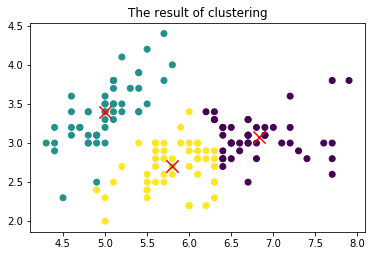

In [7]:
fig = plt.figure()
plt.scatter(X[:,0], X[:,1], c = clustering)
for i,j in centroids:
    plt.scatter(i,j,s=150,c='red',marker='x')
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title("The result of clustering")

### 1.2 Expectation Maximization Algorithm
Again, you are allowed to structure your code however you want. The template below (and the helper function `compute_probs_cx`) is identical to the one given in class at <a href="https://github.com/AlexanderMath/MLNotebooks/blob/master/AU%20ML%20course/Week-12.ipynb" target="new">week 12</a>. We recommend you use it. 

In [8]:
import numpy as np
from scipy.stats import multivariate_normal

def compute_probs_cx(points, means, covs, probs_c):
    '''
    Input
      - points: (n times d) array containing the dataset
      - means:  (k times d) array containing the k means
      - covs:   (k times d times d) array such that cov[j,:,:] is the covariance matrix of the j-th Gaussian.
      - priors: (k) array containing priors
    Output
      - probs:  (k times n) array such that the entry (i,j) represents Pr(C_i|x_j)
    '''
    # Convert to numpy arrays.
    points, means, covs, probs_c = np.asarray(points), np.asarray(means), np.asarray(covs), np.asarray(probs_c)
    
    # Get sizes
    n, d = points.shape
    k = means.shape[0]
    
    # Compute probabilities
    # This will be a (k, n) matrix where the (i,j)'th entry is Pr(C_i)*Pr(x_j|C_i).
    probs_cx = np.zeros((k, n))
    for i in range(k):
        try:
            probs_cx[i] = probs_c[i] * multivariate_normal.pdf(mean=means[i], cov=covs[i], x=points)
        except Exception as e:
            print("Cov matrix got singular: ", e)
    
    # The sum of the j'th column of this matrix is P(x_j); why?
    probs_x = np.sum(probs_cx, axis=0, keepdims=True) 
    assert probs_x.shape == (1, n)
    
    # Divide the j'th column by P(x_j). The the (i,j)'th then 
    # becomes Pr(C_i)*Pr(x_j)|C_i)/Pr(x_j) = Pr(C_i|x_j)
    probs_cx = probs_cx / probs_x
    
    
    return probs_cx, probs_x

In [9]:
def em_algorithm(X, k, T, epsilon = 0.001, means=None):
    """ Clusters the data X into k clusters using the Expectation Maximization algorithm. 
    
        Parameters
        ----------
        X : Data matrix of shape (n, d)
        k : Number of clusters.
        T : Maximum number of iterations
        epsilon :  Stopping criteria for the EM algorithm. Stops if the means of
                   two consequtive iterations are less than epsilon.
        means : (k times d) array containing the k initial means (optional)
        
        Returns
        -------
        means:     (k, d) array containing the k means
        covs:      (k, d, d) array such that cov[j,:,:] is the covariance matrix of 
                   the Gaussian of the j-th cluster
        probs_c:   (k, ) containing the probability Pr[C_i] for i=0,...,k. 
        llh:       The log-likelihood of the clustering (this is the objective we want to maximize)
    """
    n, d = X.shape
    
    # Initialize and validate mean
    if means is None: 
        means = np.random.rand(k, d)

    # Initialize cov, prior
    probs_x  = np.zeros(n) 
    probs_cx = np.zeros((k, n)) 
    probs_c  = np.zeros(k) + np.random.rand(k)

    
    covs = np.zeros((k, d, d))

    for i in range(k): covs[i] = np.identity(d)
    probs_c = np.ones(k) / k
    
    # Column names
    print("Iterations\tLLH")
    
    close = False
    old_means = np.zeros_like(means)

    iterations = 0
    while (not(close) and iterations < T):
        dummy_probs_c = np.zeros(k) + np.random.rand(k)
        dummy_means = np.zeros_like(means)
        dummy_covs = np.zeros((k, d, d))
        old_means[:] = means 

        # Expectation step
        probs_cx, probs_x = compute_probs_cx(X, means, covs, probs_c)
        assert probs_cx.shape == (k, n)

        #print(probs_cx)
        
        # Maximization step
        # YOUR CODE HERE
        #for i in range(len(means)):
        #    print("max", i)
        #    numerator = 0.0
        #    denominator = 0.0
        #    for j in range(len(probs_x)):
        #        numerator += probs_cx[i][j]*X[j]
        #        denominator += probs_cx[i][j]

        #    means[i] = numerator/denominator
        
        for j in range(k):
            for i in range(n):
                dummy_means[j] += probs_cx[j, i] * X[i]
            dummy_means[j] /= probs_cx[j, :].sum()
        
        for j in range(len(means)):
            for i in range(n):
                dummy_probs_c[j] +=  probs_cx[j,i]
        dummy_probs_c/=n
        
        for j in range(k):
            for i in range(n):
                #print('1')
                ys = np.reshape(X[i] - dummy_means[j], (2,1))
                #print('2')
                dummy_covs[j] += probs_cx[j, i] * np.dot(ys, ys.T)
            #print(3)
            dummy_covs[j] /= probs_cx[j,:].sum()
            

        # END CODE
        
        # Compute per-sample average log likelihood (llh) of this iteration     
        llh = 1/n*np.sum(np.log(probs_x))
        print(iterations+1, "\t\t", llh)

        # Stop condition
        dist = np.sqrt(((dummy_means - old_means) ** 2).sum(axis=1))
        close = np.all(dist < epsilon)
        iterations += 1
        
        if np.isnan(np.min(dummy_covs)) == False:
            covs = dummy_covs
            probs_c = dummy_probs_c
            means = dummy_means
        elif np.isnan(np.min(dummy_covs)) == True:
            break

    # Validate output
    assert means.shape == (k, d)
    assert covs.shape == (k, d, d)
    assert probs_c.shape == (k,)
    
    return means, covs, probs_c, llh

If one wants a hard clustering where each point belongs strictly to one cluster, one could assign each point to the cluster that maximize $\Pr(C_i \mid x)$ for $i=1,..,k$. You should implement the following method that does this

In [10]:
def compute_em_cluster(means, covs, probs_c, data):
    
    n, d = data.shape
    probs_cx = compute_probs_cx(data, means, covs, probs_c)[0]
    clustering = probs_cx.argmax(axis=0)
    
    return clustering 

means, covs, probs_c, llh = em_algorithm(X, 3, 100, epsilon = 0.001, means=None)
clustering = compute_em_cluster(means, covs, probs_c, X)

Iterations	LLH
1 		 -20.861453274375982
2 		 -1.791061341376011
3 		 -1.7819264805754953
4 		 -1.7752294172828489
5 		 -1.7686058586354607
6 		 -1.76395071824905
7 		 -1.7481230447860072
8 		 -1.7281412131115657
9 		 -1.709182488794345
10 		 -1.6721078941642105
11 		 -1.6225988834061051
12 		 -1.5686159780898792
13 		 -1.5282013168545168
14 		 -1.5120432080397193
15 		 -1.5044405435580541
16 		 -1.5044135142155917
17 		 -1.502524073894275
18 		 -1.5011993135298975
19 		 -1.500053379321996
20 		 -1.4985072667076198
21 		 -1.5034446757235598
22 		 -1.5055243127089497
23 		 -1.4990291453536926
24 		 -1.4944808918997488
25 		 -1.4972344592927878
26 		 -1.4970712884861903
27 		 -1.4978744600998557
28 		 -1.490186156251264
29 		 -1.4916371757534357
30 		 -1.4962609103079256
31 		 -1.4939568335889344
32 		 -1.4978020503435587
33 		 -1.4971478060179715
34 		 -1.491248188205173
35 		 -1.4968798438552549
36 		 -1.4962787400504396
37 		 -1.4910250931855338
38 		 -1.490662445986035
39 		 -1.489862

43 		 -1.4995694361499377
44 		 -1.4930520541150325
45 		 -1.4895561979683862
46 		 -1.493783238305153
47 		 -1.497126558761832
48 		 -1.4900243900960475
49 		 -1.4909665689587295
50 		 -1.489907562009976
51 		 -1.4872768483247507
52 		 -1.4889006731541763
53 		 -1.4880980918195013
54 		 -1.490786831533228
55 		 -1.485869942145207
56 		 -1.485121627961053
57 		 -1.4828199781879876
58 		 -1.4843057269895925
59 		 -1.4813552799740715
60 		 -1.4711431923708207
61 		 -1.4699247934690332
62 		 -1.4647537734182614
63 		 -1.4611977545721861
64 		 -1.4588517959100165
65 		 -1.4540827771264246
66 		 -1.4559217256908257
67 		 -1.4501926593471375
68 		 -1.4481689892444505
69 		 -1.4431158633388124
70 		 -1.4527554907411477
71 		 -1.4478592320128356
72 		 -1.4428711114601587
73 		 -1.4510713677071057
74 		 -1.448873028502009
75 		 -1.4505641432519316
76 		 -1.4430922111850792
77 		 -1.4496276055997928
78 		 -1.4462572347424427
79 		 -1.4407526183047332
80 		 -1.4061964522957204
Cov matrix got sing

/home/mateosokac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in true_divide
/home/mateosokac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:97: RuntimeWarning: invalid value encountered in less


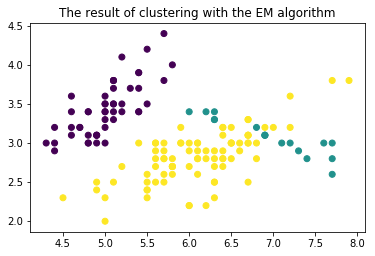

In [88]:
fig = plt.figure()
plt.scatter(X[:,0], X[:,1], c = clustering)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title("The result of clustering with the EM algorithm")
plt.savefig("clustering_em.pdf")

## 1.3: Combine Lloyd's algorithm with the Expectation Maximization algorithm 
In order to determine an initial set of cluster centers for the EM algorithm, one can utilize the best centroids determined by Lloyd's algorithm. For this, run Lloyd's algorithm several times, and choose the best one. Then run the EM algorithm with the initial means as the centroids obtained in the previous step.

Test your implementation on the Iris dataset. Compare the results with Lloyd's Algorithm and the Expectation Maximization algorithm (without Lloyd's initialization). You could compare the clusterings by visualizing them like we did in class, or by using the evaluation measure from the next section. 

In [1]:
# Load the Iris data set
import sklearn.datasets
iris = sklearn.datasets.load_iris()
X = iris['data'][:,0:2] # reduce to 2d so you can plot if you want

# YOUR CODE HERE
clustering, centroids, cost = lloyds_algorithm(X, 3, 100)
print(clustering)
means, covs, probs_c, llh = em_algorithm(X, 3, 100, epsilon = 0.001, means=centroids)
clustering = compute_em_cluster(means, covs, probs_c, X)
print(clustering)
# END CODE

NameError: name 'lloyds_algorithm' is not defined

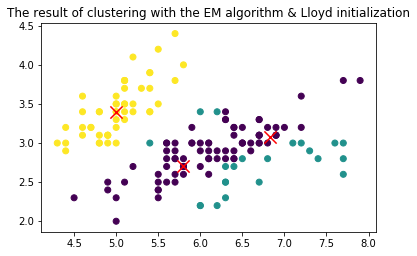

In [90]:
fig = plt.figure()
plt.scatter(X[:,0], X[:,1], c = clustering)
for i,j in centroids:
    plt.scatter(i,j,s=150,c='red',marker='x')
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title("The result of clustering with the EM algorithm & Lloyd initialization")
plt.savefig("clustering_em_lloyd.pdf")

<b>Report section 1: </b>
- Explain how you compared the results of Lloyd's algoithm and the Expectation Maximization algorithm. 
- Which algorithm performed best? 

## 2. Evaluating clusterings

Implement the F1 score (build the contingency table p. 426, measure pp. 427-428)
and the silhouette coefficient (pp. 444-445), and compare the quality of
several runs of your algorithms with different values for *k*. 

You will need labels to compute the F1 score. These are imported below

In [99]:
# Load the Iris data set
import sklearn.datasets
X, y = sklearn.datasets.load_iris(True)
X = X[:,0:2] # reduce to 2d so you can plot if you want
print(X.shape, y.shape)

(150, 2) (150,)


## 2.1 Silhouette Coefficient
Implement the Silhouette coefficient as explained during the lectures and class week 11 and 12. Explanations can be found both on slides and in the book. You can use the following template

In [11]:
from sklearn.metrics.pairwise import distance_metrics
import numpy as np

def _intra_cluster_distance(X, labels, metric, i):

    indices = np.where(labels == labels[i])[0]
    if len(indices) == 0:
        return 0.
    a = np.mean([metric(X[i].reshape(1,-1), X[j].reshape(1,-1)) for j in indices if not i == j])
    return a

def _nearest_cluster_distance(X, labels, metric, i):
    label = labels[i]
    b = np.min(
            [np.mean(
                [metric(X[i].reshape(1,-1), X[j].reshape(1,-1)) for j in np.where(labels == cur_label)[0]]
            ) for cur_label in set(labels) if not cur_label == label])
    return b

def silhouette(data, clustering): 
    n, d = data.shape
    k = np.unique(clustering)[-1]+1

    # YOUR CODE HERE
    metric = distance_metrics()['euclidean']

    silh = None
    A = np.array([_intra_cluster_distance(X, clustering, metric, i)
                  for i in range(n)])
    
    B = np.array([_nearest_cluster_distance(X, clustering, metric, i)
                  for i in range(n)])
    silh_samples = (B - A) / np.maximum(A, B)
    
    silh = np.mean(np.nan_to_num(silh_samples))
    # END CODE
    
    return silh

Try to run Lloyd's algorithm and the Expectation Maximization algorithm with different $k$ and compute the silhouette coefficient for each. You could use the following template

In [101]:
em_r_values = []
lloyd_values = []
em_l_values = []

for k in range(2, 10):
    means, covs, probs_c, llh = em_algorithm(X, k, 50)
    clustering_em = compute_em_cluster(means, covs, probs_c, X)
    em_sc = silhouette(X, clustering_em)
    print(k, em_sc)
    em_r_values.append(em_sc)
    
    clustering_l, centroids, cost = lloyds_algorithm(X, k, 50)
    lloyd_sc = silhouette(X, clustering_l)
    print(k, lloyd_sc)
    lloyd_values.append(lloyd_sc)
    
    means, covs, probs_c, llh = em_algorithm(X, k, 50, means=centroids)
    clustering_em_l = compute_em_cluster(means, covs, probs_c, X)
    em_l_sc = silhouette(X, clustering_em_l)
    print(k, em_l_sc)
    em_l_values.append(em_l_sc)
    

print(lloyd_values)
print(em_r_values)
print(em_l_values)
    


Iterations	LLH
1 		 -22.0865019884
2 		 -1.798657215
3 		 -1.79113827685
4 		 -1.78714731786
5 		 -1.79019953631
6 		 -1.78797946593
7 		 -1.78803068844
8 		 -1.78331632892
9 		 -1.7820462435
10 		 -1.76898901795
11 		 -1.74708684708
12 		 -1.73057427693
13 		 -1.7096757531
14 		 -1.70676309467
15 		 -1.69474701409
16 		 -1.69468097176
17 		 -1.69563562971
18 		 -1.69418124032
19 		 -1.69217274493
20 		 -1.68851408539
21 		 -1.69205781688
22 		 -1.69349306254
23 		 -1.68741454319
24 		 -1.68798826052
25 		 -1.68573814152
26 		 -1.68633059386
27 		 -1.67338627286
28 		 -1.66656971692
29 		 -1.65256502648
30 		 -1.6459789819
31 		 -1.63660493183
32 		 -1.62586560527
33 		 -1.60875086576
34 		 -1.58381613056
35 		 -1.55884505351
36 		 -1.53154046228
37 		 -1.50557368396
38 		 -1.49702038178
39 		 -1.49843411136
40 		 -1.50113678503
2 0.449191614825
[1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0
 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 

7 		 21.452676936
8 		 21.4402407972
9 		 21.4402407972
5 0.392018107952
Iterations	LLH
1 		 -2.45080896916
2 		 -1.74645042387
3 		 -1.71748347375
4 		 -1.69575190297
5 		 -1.66983333323
6 		 -1.64556176042
7 		 -1.61864288278
8 		 -1.59945661417
9 		 -1.57553367286
10 		 -1.53778607124
11 		 -1.49541947166
12 		 -1.47918057099
13 		 -1.46916783354
14 		 -1.45644886749
15 		 -1.44695910202
16 		 -1.44552091895
17 		 -1.44131382727
18 		 -1.42518515495
19 		 -1.4309199231
20 		 -1.42956073367
21 		 -1.42761926406
22 		 -1.42648661851
23 		 -1.41248932304
24 		 -1.41640214982
25 		 -1.40486344648
26 		 -1.4045728314
27 		 -1.39963562311
28 		 -1.40115235914
29 		 -1.39513029295
30 		 -1.39734832591
31 		 -1.39752889995
32 		 -1.40911903204
33 		 -1.39720391652
34 		 -1.39842867746
35 		 -1.39862012375
36 		 -1.39049036148
37 		 -1.39432749864
38 		 -1.3917099522
39 		 -1.39423571782
40 		 -1.40074169436
41 		 -1.40009738615
42 		 -1.39585637129
43 		 -1.39291204122
44 		 -1.3999806443
4

/Users/juci/tensorflow/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/juci/tensorflow/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


5 		 17.4291741797
6 		 17.010417488
7 		 16.8472152829
8 		 16.603946051
9 		 16.4768156639
10 		 16.3708786315
11 		 15.8337114698
12 		 15.0349441632
13 		 14.7873092862
14 		 14.6980723779
15 		 14.6847776557
16 		 14.6847776557
8 0.398372015919
Iterations	LLH
1 		 nan


/Users/juci/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:97: RuntimeWarning: invalid value encountered in less


ValueError: zero-size array to reduction operation minimum which has no identity

<b>Report 2.1: </b>
- Include a tabel that holds the silhouette coefficient for the above experiment.
- Which value of $k$ gave the best silhouette coefficient?

## 2.1 F1 Score
Implement a function that compute the F1 score. There are explanations in the slides and in the book. You can use the following template

In [ ]:
def f1(predicted, labels):
    n, = predicted.shape
    assert labels.shape == (n,)
    r = np.max(predicted) + 1
    k = np.max(labels) + 1

    # Implement the F1 score here
    # YOUR CODE HERE
    contingency = np.zeros((r, k))
    for x in range(len(predicted)):
        contingency[predicted[x], labels[x]] += 1
    
    pres = np.divide(contingency.max(axis=1), contingency.sum(axis=1))
    recall = ((contingency[:,contingency.argmax(axis=1)]).max(axis=1)/(contingency[:,contingency.argmax(axis=1)]).sum(axis=0))

    F_individual = (2*pres*recall)/(pres+recall)
    print("F_individual", F_individual)
    F_overall = sum(F_individual)/r
    
    # END CODE

    assert contingency.shape == (r, k)
    return F_individual, F_overall, contingency

Make a similar experiment as the one for the silhouette coefficient. In other words: try to run Lloyd's algorithm and the Expectation Maximization algorithm with different k and compute the F1 score for each. You could use the following template

In [ ]:
em_r_values = []
lloyd_values = []
em_l_values = []

for k in range(2, 10):
    means, covs, probs_c, llh = em_algorithm(X, k, 50)
    clustering_em = compute_em_cluster(means, covs, probs_c, X)
    em_sc = f1(clustering_em, T)[1]
    print(k, em_sc)
    em_r_values.append(em_sc)
    
    clustering_l, centroids, cost = lloyds_algorithm(X, k, 50)
    lloyd_sc = f1(clustering_l, T)[1]
    print(k, lloyd_sc)
    lloyd_values.append(lloyd_sc)
    
    means, covs, probs_c, llh = em_algorithm(X, k, 50, means=centroids)
    clustering_em_l = compute_em_cluster(means, covs, probs_c, X)
    em_l_sc = f1(clustering_em_l, T)[1]
    em_l_values.append(em_l_sc)
    
print(lloyd_values)
print(em_r_values)
print(em_l_values)

<b>Report section 2.2: </b>
- Include a tabel that holds the silhouette coefficient for the above experiment.
- Which value of $k$ gave the best silhouette coefficient?

<b>Report section 2.3: </b>Are there any differences between the two quality measures (F1 and Silhouette Coefficient)?

HINT: External/internal measures supervised/unsupervised.


# 3. Compressing images
In class week 11 you saw how to do image compression using clustering. In this section you will revisit image compression. Find a picture you like. You could Google your favourite animal, car, disney cartoon character or take a photo of your study group. You should now use Lloyd's algorithm, EM or a combination to compress your image. 

The size of images can be measured in bytes. The following code downloads an image, displays it and prints the size of the images in bytes:

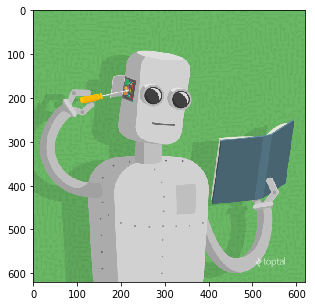

The image consumes a total of 106292 bytes. 

You should compress your image as much as possible! 


In [18]:
import scipy.misc
import matplotlib.pyplot as plt
import os

def download_image(url):
    filename = url[url.rindex('/')+1:]
    try:
        with open(filename, 'rb') as fp:
            return scipy.misc.imread(fp) / 255
    except FileNotFoundError:
        import urllib.request
        with open(filename, 'w+b') as fp, urllib.request.urlopen(url) as r:
            fp.write(r.read())
            return scipy.misc.imread(fp) / 255
 
img_facade = download_image('https://uploads.toptal.io/blog/image/443/toptal-blog-image-1407508081138.png')

fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(img_facade)
plt.show()

size = os.stat('toptal-blog-image-1407508081138.png').st_size

print("The image consumes a total of %i bytes. \n"%size)
print("You should compress your image as much as possible! ")

The following code downloads an image of the Nygaard building and attempts to compress it with Lloyd's algorithm as we did in class. It then saves the compressed version, prints the size of the original and the compressed version; it finally prints the compression ratio.  

Modify the code such that it compresses your image; <font color="red">you should get a compression ratio of at least 1.5</font>!

[0 3 0 ..., 2 2 3]
LLOYD'S ALGORITHM
Iterations	Cost
1 		 30428.6712732
2 		 4715.45564712
3 		 3378.93590299
4 		 2933.5806119
5 		 2870.69343315


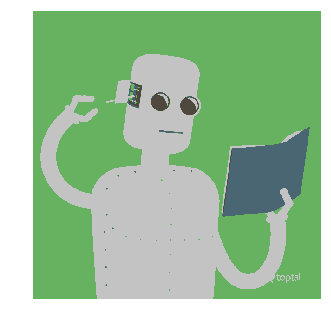

Original Size: 		 106292
Compressed Size: 	 16165
Compression Ratio: 	 6.57544


In [27]:
import os
import numpy as np

def compress_kmeans(im, k, T, name):
    height, width, depth = im.shape
    data = im.reshape((height * width, depth))
    clustering, centroids, score = lloyds_algorithm(data, k, 5)
    
    # make each entry of data to the value of it's cluster
    data_compressed = data
    
    for i in range(k): data_compressed[clustering == i] = centroids[i] 
    
    im_compressed = data_compressed.reshape((height, width, depth))
    
    # The following code should not be changed. 
    fig = plt.figure(frameon=False)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    plt.imshow(im_compressed)
    plt.savefig("compressed.jpg")
    plt.show()
    
    original_size   = os.stat(name).st_size
    compressed_size = os.stat('compressed.jpg').st_size
    print("Original Size: \t\t", original_size)
    print("Compressed Size: \t", compressed_size)
    print("Compression Ratio: \t", round(original_size/compressed_size, 5))

def compress_facade(k=4, T=100):
    img_facade = download_image('https://uploads.toptal.io/blog/image/443/toptal-blog-image-1407508081138.png')
    compress_kmeans(img_facade, k, T, 'toptal-blog-image-1407508081138.png')
    
compress_facade()

<b>Report section 3: </b>
- Include the original and the compressed image. You should state the original and compressed sizes and the compression ratio. 
- Briefly in 5 lines write what you did to compress you image. 

# 4. Sampling from MNIST
The code below runs `sklearn`'s implementation of EM on the MNIST dataset. It then prints the clusters which should look like digits. Because the clusters are represented as gaussians we can sample from them. There is a function called `sample_digits` below which can sample digits. 

Try run the code

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Initialization 0
  Iteration 0
  Iteration 1
  Iteration 2
  Iteration 3
  Iteration 4
  Iteration 5
  Iteration 6
  Iteration 7
  Iteration 8
  Iteration 9
  Iteration 10
  Iteration 11
  Iteration 12
  Iteration 13
  Iteration 14
  Iteration 15
  Iteration 16
  Iteration 17
  Iteration 18
  Iteration 19
  Iteration 20
  Iteration 21
  Iteration 22
  Iteration 23
  Iteration 24
  Iteration 25
  Iteration 26
  Iteration 27
  Iteration 28
  Iteration 29
  Iteration 30
  Iteration 31
  Iteration 32
  Iteration 33
  Iteration 34
  Iteration 35
  Iteration 36
  Iteration 37
  Iteration 38
  Iteration 39
  Iteration 40
  Iteration 41
  Iteration 42
  Iteration 43
  Iteration 44
  Iteration 45
  Iteration 46
  Iteration 47
  Iteration 48
  Iteration 49
  Iteration 50
  Iteration 51
  Iteration 52
  Iteration 53
  Iteration 5

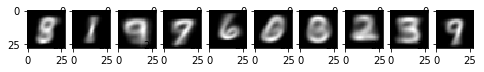

In [102]:
import tensorflow as tf
from sklearn.mixture import GaussianMixture as EM
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/")

X = mnist.train.images
y = mnist.train.labels

# One cluster for each digit
k = 10

# Run EM algorithm on 1000 images from the MNIST dataset. 
expectation_maximization = EM(n_components=k, max_iter=100, init_params='kmeans', covariance_type='diag', verbose=1, verbose_interval =1).fit(X)

means = expectation_maximization.means_
covs = expectation_maximization.covariances_
      
fig, ax = plt.subplots(1, k, figsize=(8, 1))

for i in range(k):
    ax[i].imshow(means[i].reshape(28,28), cmap='gray')
    
plt.show()


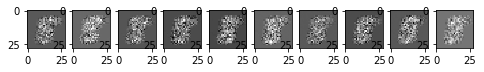

In [8]:
from scipy.stats import multivariate_normal
import numpy as np

def sample(means, covs, num):
    mean = means[num]
    cov = covs[num]
     
    fig, ax = plt.subplots(1, 10, figsize=(8, 1))
    
    for i in range(10):
        img = multivariate_normal.rvs(mean=mean, cov=cov) # draw random sample   
        ax[i].imshow(img.reshape(28, 28), cmap='gray') # draw the random sample
    plt.show()
    
sample(means, covs, 0)

<b>Report section 4: </b>
- Explain why we can generate images of "digits" using the Expectation Maximization algorithm. 
- (optional) Why does the sampled images look <a hrf="https://boofcv.org/images/1/18/Example_lena_denoise_noisy.jpg" target="new">noisy</a>?

## Deliverables
As part of the handin you must submit the following.

### Code
You must include a `.py` file including your implementations of the two algorithms (Lloyd and EM) and the two evaluation measures (Silhouette coefficient and F1 score). Alternatively, you could code everything in here and upload the final IPython Notebook. 

### Report
Your report should be no more than 5 pages and clearly state who is in the group. It must cover:

* Summary/Abstract: The status of the work, i.e., does it work, if not, then why.

<b>Report section 1: </b>
- Explain how you compared the results of Lloyd's algoithm and the Expectation Maximization algorithm. 
- Which algorithm performed best? 

<b>Report section 2.1: </b>
- Include a tabel that holds the silhouette coefficient for the above experiment.
- Which value of $k$ gave the best silhouette coefficient?

<b>Report section 2.2: </b>
- Include a tabel that holds the silhouette coefficient for the above experiment.
- Which value of $k$ gave the best silhouette coefficient?

<b>Report section 2.3: </b>Are there any differences between the two quality measures (F1 and Silhouette Coefficient)?

HINT: External/internal measures supervised/unsupervised.

<b>Report section 3: </b>
- Include the original and the compressed image. You should state the original and compressed sizes and the compression ratio. 
- Briefly in 5 lines write what you did to compress you image. 

<b>Report section 4: </b>
- Explain why we can generate images of digits using the Expectation Maximization algorithm. 
- (optional) Why does the sampled images look <a hrf="https://boofcv.org/images/1/18/Example_lena_denoise_noisy.jpg" target="new">noisy</a>?</div>

<!--
* A discussion of plots of at least two runs of your algorithm
  implementations detailing what you can see. Make sure that you relate this
  to the discussion in the lecture or textbook about the strengths and
  weaknesses of the algorithms.
* A discussion of plots of the evaluation measures F1 and silhouette
  coefficient, detailing what you can learn from them. Include an explanation
  of what the evaluation measures reflect. TODO: Compute for several k's?
* Describe how you can use one of the clustering algorithms for image
  compression, and demonstrate the results for at least one algorithm on both
  images, discussing their quality and giving a reasoning for the differences. -->
  
